In [ ]:
# Теперь мы знаем, как работает алгоритм k-means, но не хотелось бы реализовывать его с нуля. Для того чтобы 
# запустить алгоритм кластеризации k-means, нам нужна библиотека sklearn и модуль KMeans.
# Что необходимо для запуска?
# Обязательно задать количество кластеров, на которые необходимо разделить данные.
# Данные, т. е. параметры объектов (), которые мы будем передавать в виде матрицы наблюдений X.
# После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот 
# объект относится:

# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

In [ ]:
# Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут 
# отнесены новые данные из df2, то мы просто воспользуемся методом predict:

X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

- n_clusters — количество кластеров. По умолчанию — 8.
- init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.
- n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.
- max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
- random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data\pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

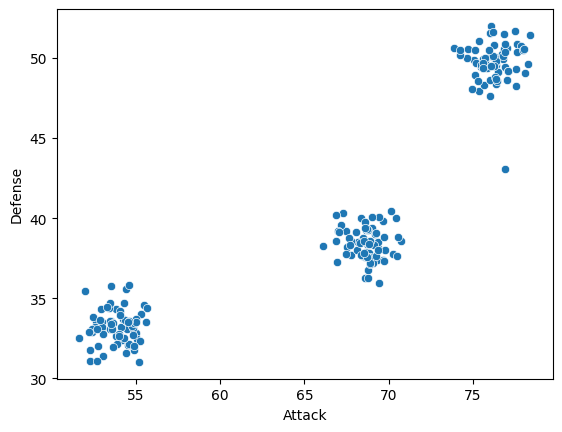

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм k-means. При инициализации зададим параметры моделирования:

- n_clusters — количество кластеров;
- init — стратегия кластеризации;
- n_init — количество запусков алгоритма k-means;
- random_state — чтобы результаты воспроизводились от запуска к запуску.

<Axes: xlabel='Attack', ylabel='Defense'>

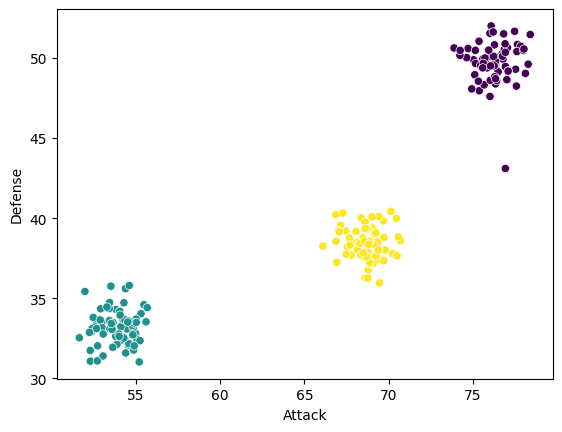

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

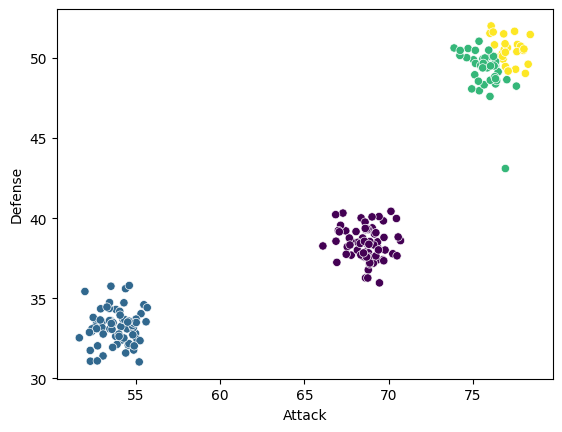

In [4]:
# В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

# Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

# Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

In [5]:
# В трёхмерном и другом -мерном случае кластеризация запускается следующим образом:

# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

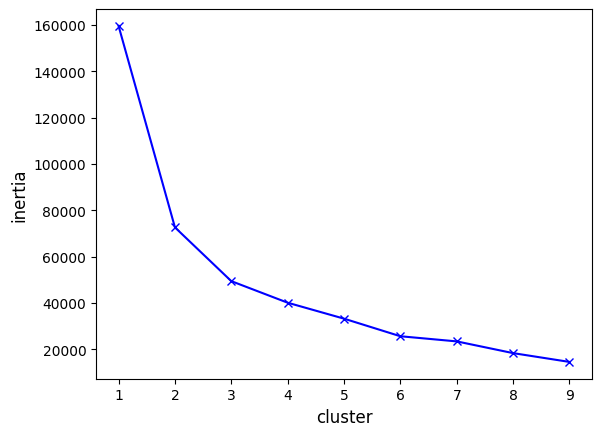

In [6]:
# ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО k
# МЕТОД ЛОКТЯ

# Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством 
# кластеров. Для этого напишем функцию get_inertia, которая будет принимать данные и количество кластеров и 
# возвращать значение инерции:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

<Axes: xlabel='cluster', ylabel='silhouette'>

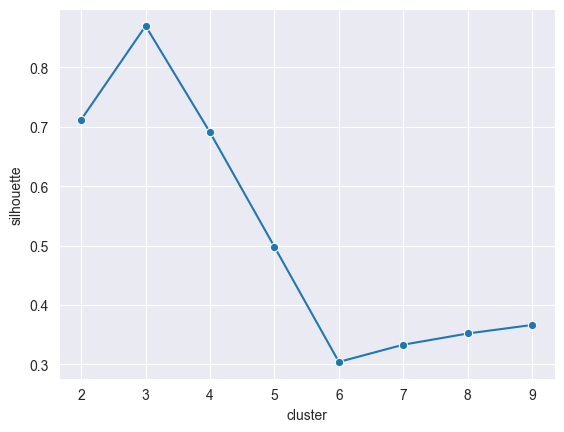

In [7]:
# КОЭФФИЦИЕНТ СИЛУЭТА

# Посчитаем силуэт, используя sklearn:

# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [10]:
# загружаем данные
data = pd.read_csv('data/values_from_the_instrument.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

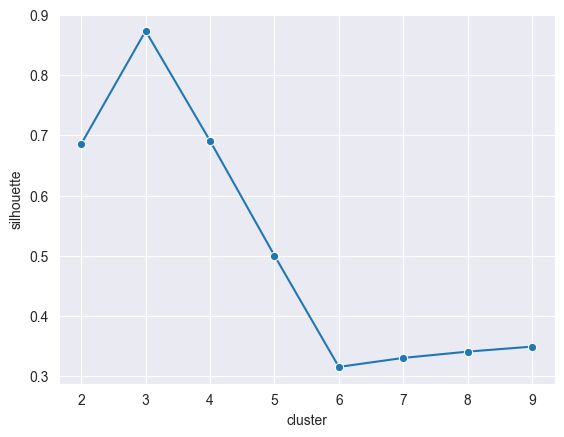

In [12]:
# функция
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = data[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

In [22]:
# ОДНОРОДНОСТЬ КЛАСТЕРОВ (homogeneity score)

# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
# > 1.0
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))
# > 1.0

# Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по 
# составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

1.0
1.0


In [15]:
# Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и 
# четырьмя кластерами:

# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# >1.0
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# >1.0
# Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на 
# большее количество кластеров, внутри кластеров данные остались однородными.

1.0
1.0


In [16]:
# ПОЛНОТА КЛАСТЕРА (completeness score)

# При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со 
# всеми собаками), при минимальном заполнении — 0.

# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, 
# подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])
1.0

1.0

In [18]:
# Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и 
# четырьмя кластерами:

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# > 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# > 0.829867483307009
# Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к 
# третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому 
# метрика полноты меньше 1, но всё же её значение не такое низкое.

1.0
0.8334191510029214


In [20]:
# V-МЕРА (V-Measure)

# Посчитаем V-меру для двух случаев кластеризации датасета с покемонами:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# >1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# >0.9070246789753754
# В первом случае и полнота, и однородность кластеров были равны 1, поэтому V-мера, основанная на этих двух метриках, 
# получила максимальное значение (1). Во втором случае полнота кластеризации была равна 0.83, так как один из 
# кластеров был наполнен наполовину. Этот факт отразился и на значении V-меры, но, так как однородность кластеров 
# имела максимальное значение,V-мера приняла значение 0.9.

1.0
0.9091419717602737


In [19]:
# ИНДЕКС РЕНДА
# Запустим подсчёт индекса Рэнда в sklearn:

# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
# 1.0
# В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали 
# в те кластеры, в которые должны были попасть.

1.0